Submitted By: Salina Gurung

PART 1


Task 1

In [1]:
import numpy as np

def logistic_function(x):
    return 1 / (1 + np.exp(-x))


Task 2

In [2]:
def log_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


Task 3

In [3]:
def cost_function(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    n = len(y_true)
    loss_vec = log_loss(y_true, y_pred)
    return np.sum(loss_vec) / n


Task 4

In [ ]:
def costfunction_logreg(X, y, w, b):
    n, d = X.shape
    z = np.dot(X, w) + b
    y_pred = logistic_function(z)
    return cost_function(y, y_pred)


Task 5

In [4]:
def compute_gradient(X, y, w, b):
    n, d = X.shape
    z = np.dot(X, w) + b
    y_pred = logistic_function(z)
    error = y_pred - y
    grad_w = np.dot(X.T, error) / n
    grad_b = np.sum(error) / n
    return grad_w, grad_b


Task 6

In [5]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    n, d = X.shape
    cost_history = []
    params_history = []

    for i in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)
        w -= alpha * grad_w
        b -= alpha * grad_b
        cost = costfunction_logreg(X, y, w, b)
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history


Task 7

In [6]:
def prediction(X, w, b, threshold=0.5):
    z = np.dot(X, w) + b
    y_prob = logistic_function(z)
    return (y_prob >= threshold).astype(int)


Task 8

In [7]:
def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    confusion_matrix = np.array([[TN, FP],
                                  [FN, TP]])

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    return {
        "confusion_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }

Summary of Figure 3: Pictorial Representation of Logistic Regression

Figure 3 visually summarizes the complete workflow of logistic (sigmoid) regression for binary classification.

The figure shows that the model starts with input features

Summary of Figure 3: Pictorial Representation of Logistic Regression

Figure 3 visually summarizes the complete workflow of logistic (sigmoid) regression for binary classification.

The figure shows that the model starts with input features
𝑥
1
,
𝑥
2
,
…
,
𝑥
𝑑
x
1
	​

,x
2
	​

,…,x
d
	​

, which are each multiplied by their corresponding weights
𝑤
1
,
𝑤
2
,
…
,
𝑤
𝑑
w
1
	​

,w
2
	​

,…,w
d
	​

. These weighted inputs are then summed together and combined with a bias term
𝑏
b to produce a linear score:

𝑧
=
𝑤
𝑇
𝑥
+
𝑏
z=w
T
x+b

This linear score is passed through the sigmoid (logistic) function, which converts it into a probability value between 0 and 1. This probability represents how likely the input belongs to the positive class (class 1).

The figure then shows a decision threshold (typically 0.5) applied to this probability:

If the predicted probability is greater than or equal to 0.5, the output is classified as class 1

If it is less than 0.5, the output is classified as class 0

Finally, the figure indicates that the predicted output is compared with the true label, and the error is measured using the log-loss (binary cross-entropy) function. This error is used to update the weights and bias through gradient descent, enabling the model to learn an optimal decision boundary.


PART 2

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


Task 1

In [9]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)



Task 2

In [10]:
def loss_softmax(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-10))

Task 3

In [11]:
def cost_softmax(X, y, W, b):
    n = X.shape[0]
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return -np.sum(y * np.log(y_pred + 1e-10)) / n


Task 4

In [12]:
def compute_gradient_softmax(X, y, W, b):
    n = X.shape[0]
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    grad_W = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n
    return grad_W, grad_b


Task 5

In [13]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    cost_history = []
    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W -= alpha * grad_W
        b -= alpha * grad_b
        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(i, cost)
    return W, b, cost_history


Task 6

In [14]:
def predict_softmax(X, W, b):
    return np.argmax(softmax(np.dot(X, W) + b), axis=1)


Task 7

In [15]:
def evaluate_classification(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)
    return cm, precision, recall, f1


Task 8

In [17]:
df = pd.read_csv("/content/drive/MyDrive/Ai/Iris.csv")


Task 9

In [18]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


Task 10

In [19]:
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))


Task 11

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Task 12

In [21]:
W = np.zeros((X_train.shape[1], y_train.shape[1]))
b = np.zeros(y_train.shape[1])
W, b, cost_history = gradient_descent_softmax(
    X_train, y_train, W, b, alpha=0.1, n_iter=1000, show_cost=True
)


0 0.9806550517714672
100 0.2402931505626506
200 0.16695226750372977
300 0.13045173576456368
400 0.10792979890086428
500 0.09246411895389808
600 0.08111900159940699
700 0.07240984460513135
800 0.06549685101846853
900 0.05986631865080147
999 0.05522813550971868


Task 13

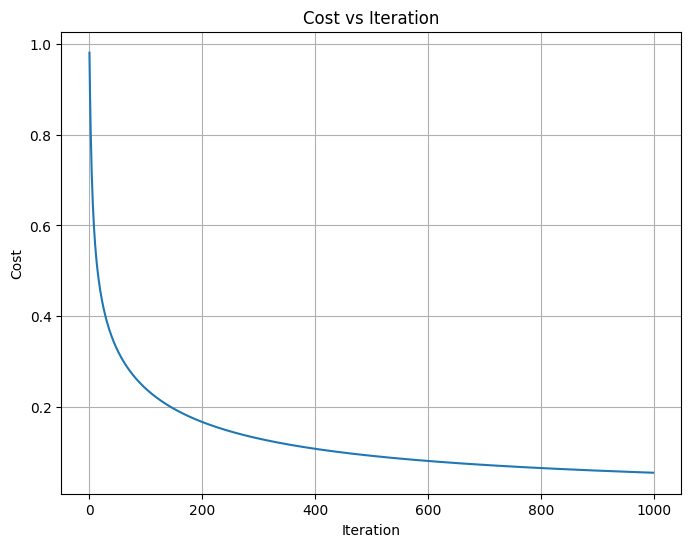

In [22]:
plt.figure(figsize=(8,6))
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iteration")
plt.grid()
plt.show()


Task 14

In [23]:
y_train_pred = predict_softmax(X_train, W, b)
y_test_pred = predict_softmax(X_test, W, b)
train_cost = cost_softmax(X_train, y_train, W, b)
test_cost = cost_softmax(X_test, y_test, W, b)
train_cost, test_cost


(np.float64(0.05522813550971868), np.float64(0.0411992789134824))

Task 15

In [25]:
y_test_true = np.argmax(y_test, axis=1)
accuracy = np.mean(y_test_pred == y_test_true) * 100
accuracy
cm, precision, recall, f1 = evaluate_classification(y_test_true, y_test_pred)
cm, precision, recall, f1


(array([[10,  0,  0],
        [ 0, 10,  0],
        [ 0,  0, 10]]),
 1.0,
 1.0,
 1.0)

Task 16

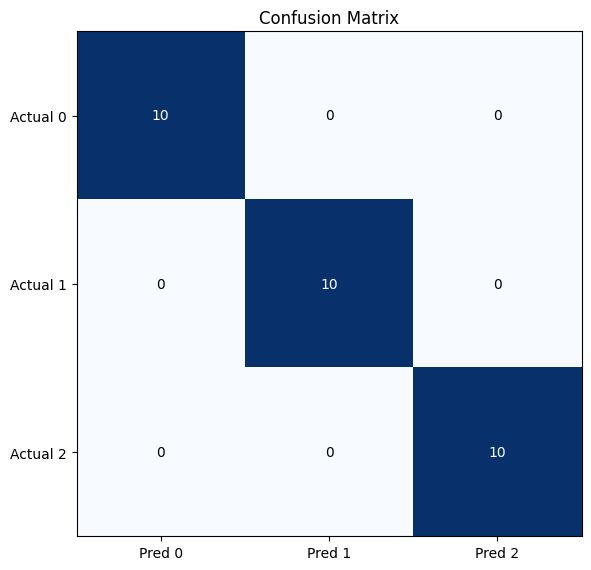

In [26]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm, cmap="Blues")
ax.set_xticks(range(3))
ax.set_yticks(range(3))
ax.set_xticklabels(["Pred 0","Pred 1","Pred 2"])
ax.set_yticklabels(["Actual 0","Actual 1","Actual 2"])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center",
                color="white" if cm[i, j] > np.max(cm)/2 else "black")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
